# Kernel Density Estimation

In [1]:
%load_ext autoreload
%autoreload 2

In [80]:
from DoTLMViz import CkptedTransformer
from transformers import GPT2Tokenizer
from rich import print

import torch
import matplotlib.pyplot as plt

In [3]:
model = CkptedTransformer.from_pretrained("gpt2-small")

In [4]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

c:\Users\NITRO5\miniconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
text = "alpha beta gamma delta epsilon eta zeta"
tokens = tokenizer(text, return_tensors="pt")["input_ids"]

In [14]:
logits, ckpts = model.run_with_ckpts(tokens)

In [15]:
print(ckpts.keys())

dict_keys(['ckpt_embed', 'ckpt_pos_embed', 'blocks.0.ckpt_resid_pre', 'blocks.0.ln1.ckpt_scaled', 
'blocks.0.ln1.ckpt_normalized', 'blocks.0.attn.ckpt_q', 'blocks.0.attn.ckpt_k', 'blocks.0.attn.ckpt_v', 
'blocks.0.attn.ckpt_scores', 'blocks.0.attn.ckpt_pattern', 'blocks.0.attn.ckpt_z', 'blocks.0.attn.ckpt_attn_out', 
'blocks.0.ckpt_resid_mid', 'blocks.0.ln2.ckpt_scaled', 'blocks.0.ln2.ckpt_normalized', 'blocks.0.mlp.ckpt_pre', 
'blocks.0.mlp.ckpt_post', 'blocks.0.mlp.ckpt_mlp_out', 'blocks.0.ckpt_resid_post', 'blocks.1.ckpt_resid_pre', 
'blocks.1.ln1.ckpt_scaled', 'blocks.1.ln1.ckpt_normalized', 'blocks.1.attn.ckpt_q', 'blocks.1.attn.ckpt_k', 
'blocks.1.attn.ckpt_v', 'blocks.1.attn.ckpt_scores', 'blocks.1.attn.ckpt_pattern', 'blocks.1.attn.ckpt_z', 
'blocks.1.attn.ckpt_attn_out', 'blocks.1.ckpt_resid_mid', 'blocks.1.ln2.ckpt_scaled', 
'blocks.1.ln2.ckpt_normalized', 'blocks.1.mlp.ckpt_pre', 'blocks.1.mlp.ckpt_post', 'blocks.1.mlp.ckpt_mlp_out', 
'blocks.1.ckpt_resid_post', 'blocks.2.ckpt_resid_pre', 'blocks.2.ln1.ckpt_scaled', 'blocks.2.ln1.ckpt_normalized', 
'blocks.2.attn.ckpt_q', 'blocks.2.attn.ckpt_k', 'blocks.2.attn.ckpt_v', 'blocks.2.attn.ckpt_scores', 
'blocks.2.attn.ckpt_pattern', 'blocks.2.attn.ckpt_z', 'blocks.2.attn.ckpt_attn_out', 'blocks.2.ckpt_resid_mid', 
'blocks.2.ln2.ckpt_scaled', 'blocks.2.ln2.ckpt_normalized', 'blocks.2.mlp.ckpt_pre', 'blocks.2.mlp.ckpt_post', 
'blocks.2.mlp.ckpt_mlp_out', 'blocks.2.ckpt_resid_post', 'blocks.3.ckpt_resid_pre', 'blocks.3.ln1.ckpt_scaled', 
'blocks.3.ln1.ckpt_normalized', 'blocks.3.attn.ckpt_q', 'blocks.3.attn.ckpt_k', 'blocks.3.attn.ckpt_v', 
'blocks.3.attn.ckpt_scores', 'blocks.3.attn.ckpt_pattern', 'blocks.3.attn.ckpt_z', 'blocks.3.attn.ckpt_attn_out', 
'blocks.3.ckpt_resid_mid', 'blocks.3.ln2.ckpt_scaled', 'blocks.3.ln2.ckpt_normalized', 'blocks.3.mlp.ckpt_pre', 
'blocks.3.mlp.ckpt_post', 'blocks.3.mlp.ckpt_mlp_out', 'blocks.3.ckpt_resid_post', 'blocks.4.ckpt_resid_pre', 
'blocks.4.ln1.ckpt_scaled', 'blocks.4.ln1.ckpt_normalized', 'blocks.4.attn.ckpt_q', 'blocks.4.attn.ckpt_k', 
'blocks.4.attn.ckpt_v', 'blocks.4.attn.ckpt_scores', 'blocks.4.attn.ckpt_pattern', 'blocks.4.attn.ckpt_z', 
'blocks.4.attn.ckpt_attn_out', 'blocks.4.ckpt_resid_mid', 'blocks.4.ln2.ckpt_scaled', 
'blocks.4.ln2.ckpt_normalized', 'blocks.4.mlp.ckpt_pre', 'blocks.4.mlp.ckpt_post', 'blocks.4.mlp.ckpt_mlp_out', 
'blocks.4.ckpt_resid_post', 'blocks.5.ckpt_resid_pre', 'blocks.5.ln1.ckpt_scaled', 'blocks.5.ln1.ckpt_normalized', 
'blocks.5.attn.ckpt_q', 'blocks.5.attn.ckpt_k', 'blocks.5.attn.ckpt_v', 'blocks.5.attn.ckpt_scores', 
'blocks.5.attn.ckpt_pattern', 'blocks.5.attn.ckpt_z', 'blocks.5.attn.ckpt_attn_out', 'blocks.5.ckpt_resid_mid', 
'blocks.5.ln2.ckpt_scaled', 'blocks.5.ln2.ckpt_normalized', 'blocks.5.mlp.ckpt_pre', 'blocks.5.mlp.ckpt_post', 
'blocks.5.mlp.ckpt_mlp_out', 'blocks.5.ckpt_resid_post', 'blocks.6.ckpt_resid_pre', 'blocks.6.ln1.ckpt_scaled', 
'blocks.6.ln1.ckpt_normalized', 'blocks.6.attn.ckpt_q', 'blocks.6.attn.ckpt_k', 'blocks.6.attn.ckpt_v', 
'blocks.6.attn.ckpt_scores', 'blocks.6.attn.ckpt_pattern', 'blocks.6.attn.ckpt_z', 'blocks.6.attn.ckpt_attn_out', 
'blocks.6.ckpt_resid_mid', 'blocks.6.ln2.ckpt_scaled', 'blocks.6.ln2.ckpt_normalized', 'blocks.6.mlp.ckpt_pre', 
'blocks.6.mlp.ckpt_post', 'blocks.6.mlp.ckpt_mlp_out', 'blocks.6.ckpt_resid_post', 'blocks.7.ckpt_resid_pre', 
'blocks.7.ln1.ckpt_scaled', 'blocks.7.ln1.ckpt_normalized', 'blocks.7.attn.ckpt_q', 'blocks.7.attn.ckpt_k', 
'blocks.7.attn.ckpt_v', 'blocks.7.attn.ckpt_scores', 'blocks.7.attn.ckpt_pattern', 'blocks.7.attn.ckpt_z', 
'blocks.7.attn.ckpt_attn_out', 'blocks.7.ckpt_resid_mid', 'blocks.7.ln2.ckpt_scaled', 
'blocks.7.ln2.ckpt_normalized', 'blocks.7.mlp.ckpt_pre', 'blocks.7.mlp.ckpt_post', 'blocks.7.mlp.ckpt_mlp_out', 
'blocks.7.ckpt_resid_post', 'blocks.8.ckpt_resid_pre', 'blocks.8.ln1.ckpt_scaled', 'blocks.8.ln1.ckpt_normalized', 
'blocks.8.attn.ckpt_q', 'blocks.8.attn.ckpt_k', 'blocks.8.attn.ckpt_v', 'blocks.8.attn.ckp

In [173]:
ln_pre = ckpts.get(act_name="resid_pre", block=0)
ln_pre = ln_pre.detach().cpu()

In [174]:
ln_post = ckpts.get(act_name="normalized", layer_name="ln1", block=0)
ln_post = ln_post.detach().cpu()

In [175]:
def epanechnikov(v, h):
    return torch.where(torch.abs(v / h) <= 1, 0.75 * (1 - (v / h) ** 2), 0)

In [176]:
epanechnikov(ln_pre, 7)

tensor([[[0.7495, 0.7482, 0.7500,  ..., 0.7498, 0.7477, 0.7496],
         [0.7499, 0.7497, 0.7500,  ..., 0.7498, 0.7494, 0.7487],
         [0.7496, 0.7492, 0.7498,  ..., 0.7498, 0.7497, 0.7499],
         ...,
         [0.7495, 0.7498, 0.7485,  ..., 0.7493, 0.7499, 0.7499],
         [0.7499, 0.7500, 0.7498,  ..., 0.7499, 0.7500, 0.7495],
         [0.7500, 0.7494, 0.7485,  ..., 0.7495, 0.7500, 0.7473]]])

In [177]:
epanechnikov((0 - ln_pre), 7).mean() / 7

tensor(0.1070)

In [178]:
epanechnikov((20 - ln_pre), 7).mean() / 7

tensor(0.)

In [179]:
epanechnikov((torch.tensor([0, 20]).reshape(2, 1, 1) - ln_pre), 7).mean(dim=[1, 2]) / 7

tensor([0.1070, 0.0000])

In [180]:
(torch.tensor([0, 20]).reshape(2, 1, 1) - ln_pre).mean(dim=[1, 2])

tensor([1.4446e-03, 2.0001e+01])

In [181]:
x = torch.linspace(-5, 5, 1000)

In [182]:
y = epanechnikov(x.reshape(-1, 1, 1) - ln_pre, 0.17).mean(dim=[1, 2])

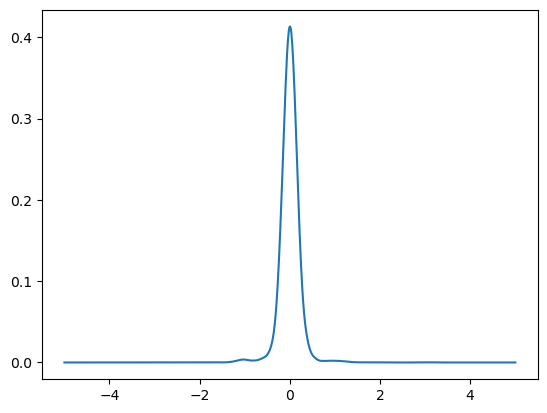

In [183]:
plt.plot(x, y)

In [184]:
y = epanechnikov(x.reshape(-1, 1, 1) - ln_post, 0.17).mean(dim=[1, 2])

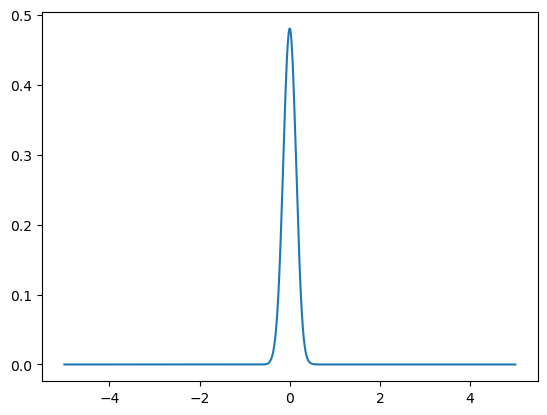

In [185]:
plt.plot(x, y)

In [146]:
u = ln_post.mean()
var = ln_post.var()

In [155]:
u, var

(tensor(-0.0057), tensor(0.0141))

In [147]:
def normal(x, u, var):
    return 1 / (torch.sqrt(var * 2 * torch.pi)) * torch.exp(-1 / 2 * (x - u) ** 2 / var)

In [153]:
y = 1 / torch.sqrt(torch.tensor(2 * torch.pi)) * torch.exp(-(x**2) / 2)

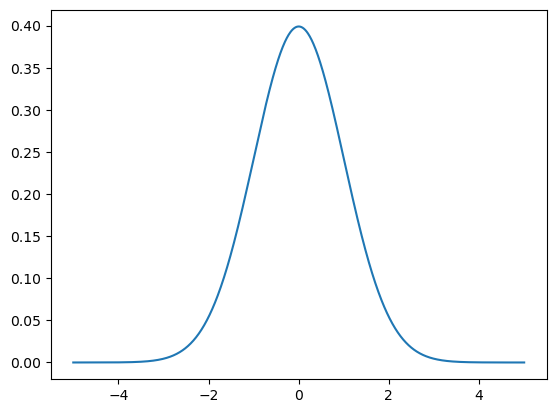

In [154]:
plt.plot(x, y)

In [168]:
def convert_to_points(arr1, arr2):
    assert len(arr1) == len(arr2), "The length of the two arrays must be equal."
    points = [{"x": el1.item(), "y": el2.item()} for (el1, el2) in zip(arr1, arr2)]
    return points


class KernelDensityEstimator:
    def __init__(self, kernel, bandwidth):
        self.kernel = kernel
        self.bandwidth = bandwidth

    def estimate(self, data, start: float, end: float, steps=None):
        steps = 1 if steps is None else steps
        x = torch.linspace(start, end, steps).reshape(-1, 1, 1)
        y = self.kernel(x - data, self.bandwidth).mean(dim=[1, 2])
        return convert_to_points(x.squeeze(), y)

In [169]:
estimator = KernelDensityEstimator(epanechnikov, 0.17)

In [172]:
estimator.estimate(ln_pre, -5, 5, 1000)

{'x': 0.005005359649658203, 'y': 0.2845475971698761}